In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df=pd.read_csv('train_v9rqX0R.csv')

In [3]:
print(df.shape)

(8523, 12)


In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.Outlet_Establishment_Year.value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

Observation:
1. Item Visibility cannot be 0.
2. Outlet establishment years are from 1985 to 2009.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
cat_col = list(df.select_dtypes('object').columns)
cat_col = [x for x in cat_col if x not in ['Item_Identifier','Outlet_Identifier','source']]

for col in cat_col:
    print(col, ' :')
    print(df[col].value_counts(), end='\n\n')

Item_Fat_Content  :
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type  :
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size  :
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type  :
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type  :
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Ty

Observation:
1. Item fat content contains some mis code values.
2. Some item types have very less numbers.

In [9]:
# Filling values to null weight
item_avg_weight = df.pivot_table(values='Item_Weight', columns='Item_Identifier')
item_avg_weight

Item_Identifier,DRA12,DRA24,DRA59,DRB01,DRB13,DRB24,DRB25,DRB48,DRC01,DRC12,...,NCZ05,NCZ06,NCZ17,NCZ18,NCZ29,NCZ30,NCZ41,NCZ42,NCZ53,NCZ54
Item_Weight,11.6,19.35,8.27,7.39,6.115,8.785,12.3,16.75,5.92,17.85,...,8.485,19.6,12.15,7.825,15.0,6.59,19.85,10.5,9.6,14.65


In [10]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
# Filling values to null weight
mean_value=df['Item_Weight'].mean()
mean_value
print('Missing Values: %d'% df.Item_Weight.isna().sum())
df['Item_Weight']=df['Item_Weight'].fillna(value=mean_value)
print('Missing Values after: %d'% sum(df['Item_Weight'].isnull()))

Missing Values: 1463
Missing Values after: 0


In [13]:
df["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [14]:
df.groupby(["Outlet_Type"])["Outlet_Size"].value_counts()

Outlet_Type        Outlet_Size
Grocery Store      Small           528
Supermarket Type1  Small          1860
                   High            932
                   Medium          930
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
Name: Outlet_Size, dtype: int64

In [15]:
outlet_size_mode = df.pivot_table(values="Outlet_Size", columns="Outlet_Type", aggfunc=(lambda x: x.mode()))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [16]:
# Filling values to null outlet size
missing_values = df['Outlet_Size'].isnull()

print('Missing Values: %d'% sum(missing_values))
df.loc[missing_values, 'Outlet_Size'] = df.loc[missing_values, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
print('Missing Values: %d'% sum(df['Outlet_Size'].isnull()))

Missing Values: 2410
Missing Values: 0


In [17]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Feature engineering

In [19]:
df['Item_Fat_Content'].unique()
#Low Fat , low fat and LF all are same
# Regular and reg is also same

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [20]:
df.replace({'Item_Fat_Content': {
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'reg': 'Regular'
}}, inplace=True)

In [21]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [22]:
df.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

Data Visualization¶

In [23]:
outlet_sales = df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().sort_values(ascending=False)

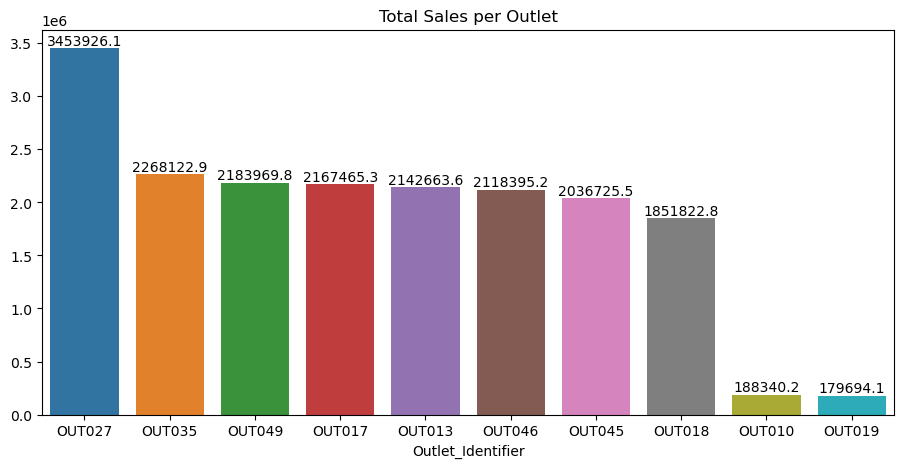

In [24]:
plt.figure(figsize=(11, 5))
ax = sns.barplot(x=outlet_sales.index, y=outlet_sales.values, order=outlet_sales.index)
ax.bar_label(ax.containers[0], fmt='%.1f')
plt.title('Total Sales per Outlet')
plt.show()

Here, We can see that
1. Highest sales obtain from OUT027.
2. OUT010 and OUT019 are not doing well.

In [25]:
item_type_sales = df.groupby('Item_Type')['Item_Outlet_Sales'].sum()

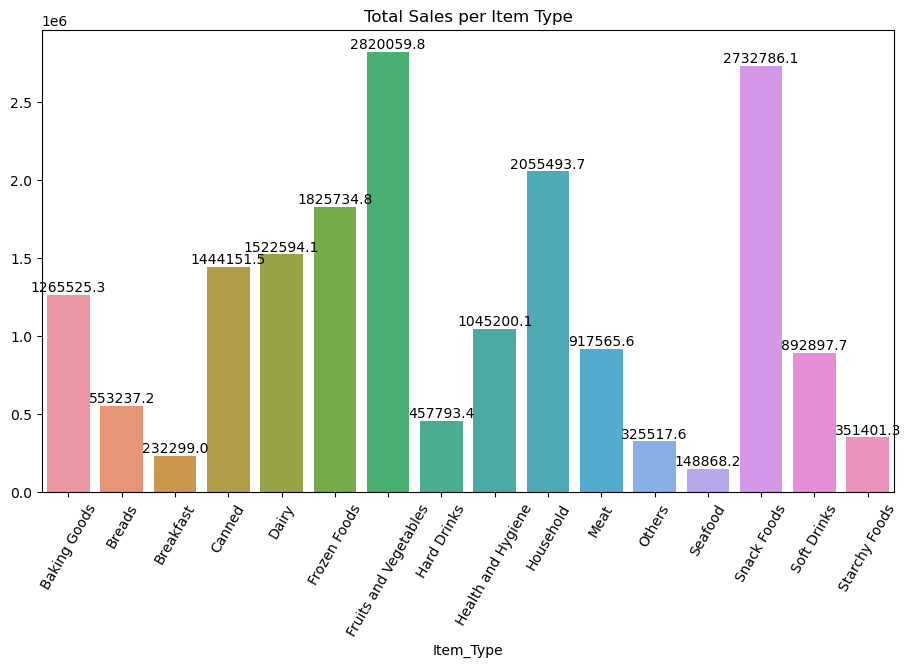

In [26]:
plt.figure(figsize=(11, 6))
ax = sns.barplot(x=item_type_sales.index, y=item_type_sales.values, order=item_type_sales.index)
ax.bar_label(ax.containers[0], fmt='%.1f')
plt.xticks(rotation=60)
plt.title('Total Sales per Item Type')
plt.show()

Text(0.5, 1.0, 'No of items sold since')

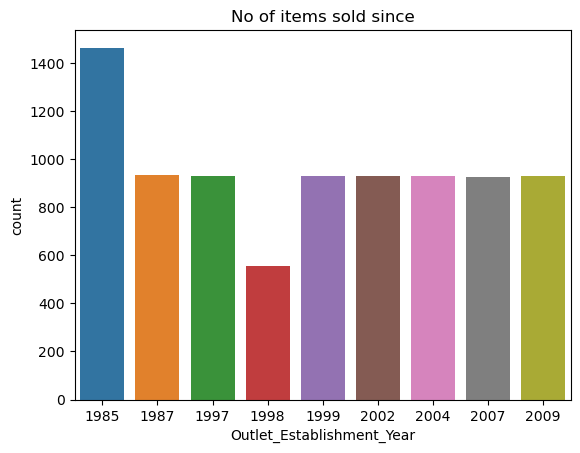

In [27]:
sns.countplot(x=df['Outlet_Establishment_Year'])
plt.title('No of items sold since')

<Figure size 600x600 with 0 Axes>

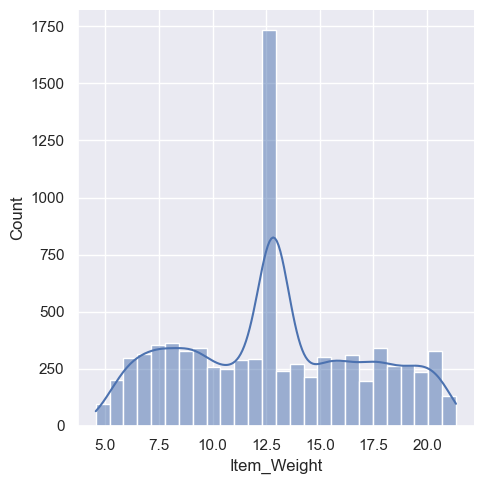

In [28]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(6,6))
sns.displot(df['Item_Weight'], kde=True)
plt.show()

<Figure size 600x600 with 0 Axes>

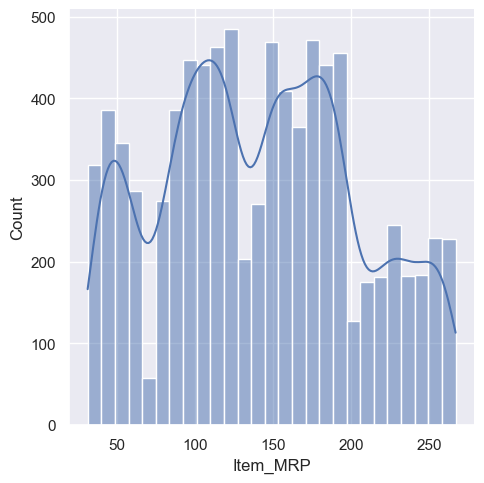

In [29]:
plt.figure(figsize=(6,6))
sns.displot(df['Item_MRP'], kde=True)
plt.show()

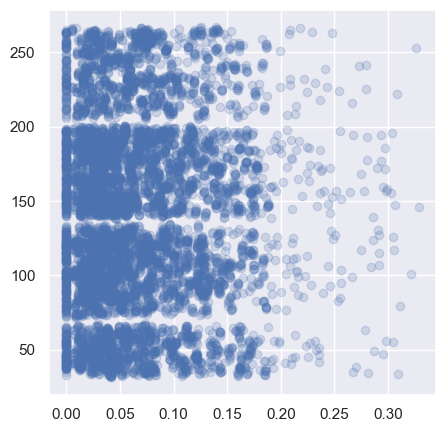

In [30]:
plt.figure(figsize=(5, 5))
plt.scatter(x=df['Item_Visibility'], y=df['Item_MRP'], alpha=0.2)

In [31]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [32]:
# Item_Identifier and Item_Type both are doing the same thing then just Item_Identifier
df.drop('Item_Identifier' , axis=1 , inplace=True)

In [33]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


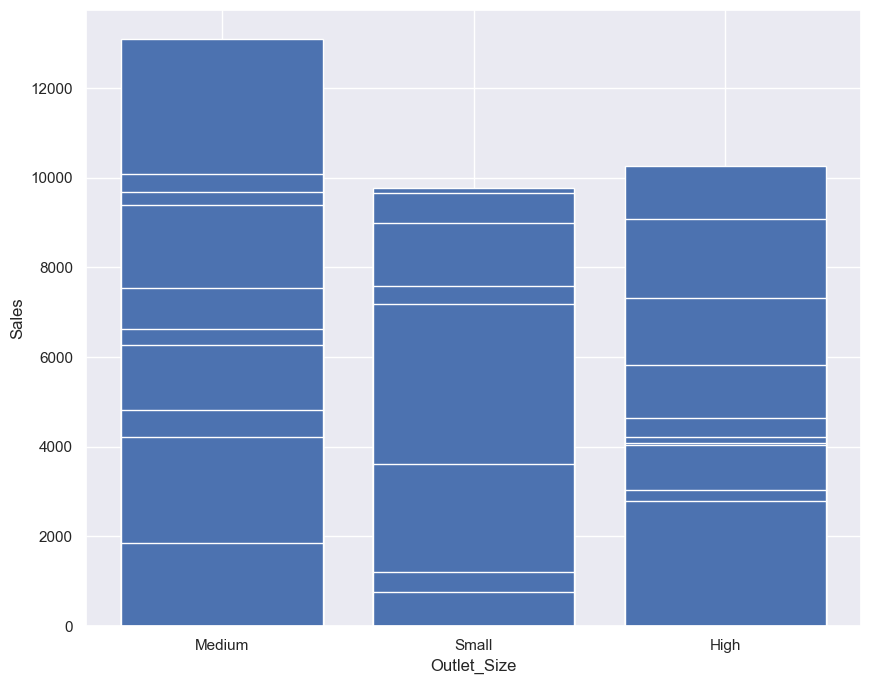

In [34]:
plt.rcParams['figure.figsize']=(10,8)
plt.bar(df.Outlet_Size,df['Item_Outlet_Sales']);
plt.rcParams.update({'font.size':14});
plt.xlabel('Outlet_Size');
plt.ylabel('Sales');

Observation
Outlet_Size doesn't have that much impact on final sales 
then we will do one hot encoding for Outlet_Size Columns 

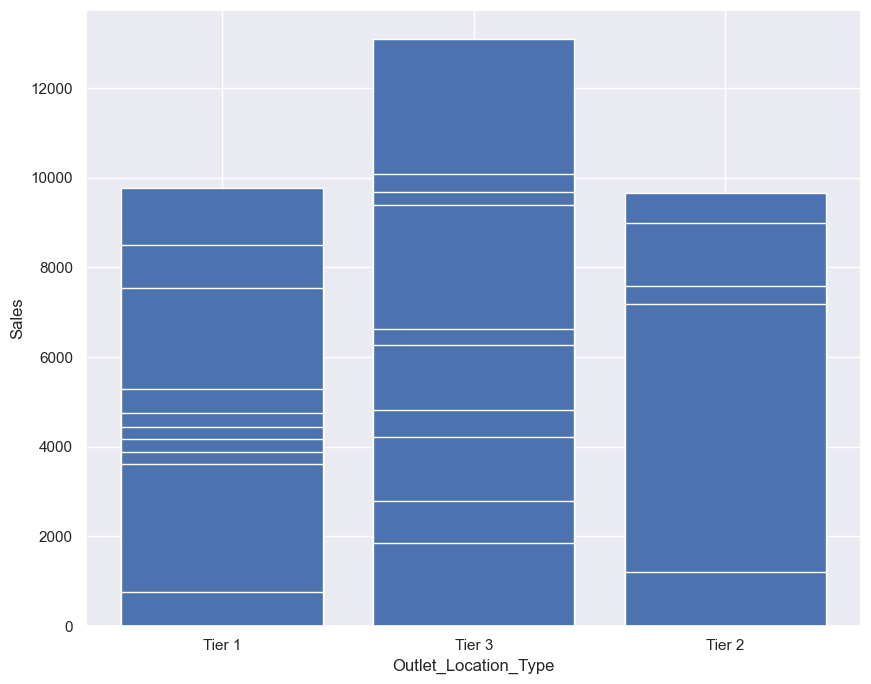

In [35]:
plt.rcParams['figure.figsize']=(10,8)
plt.bar(df.Outlet_Location_Type,df['Item_Outlet_Sales']);
plt.rcParams.update({'font.size':14});
plt.xlabel('Outlet_Location_Type');
plt.ylabel('Sales');

Observation 
Outlet_Location_Type doesn't have that much impact on final sales
then we will do one hot encoding for Outlet_Location_Type Columns

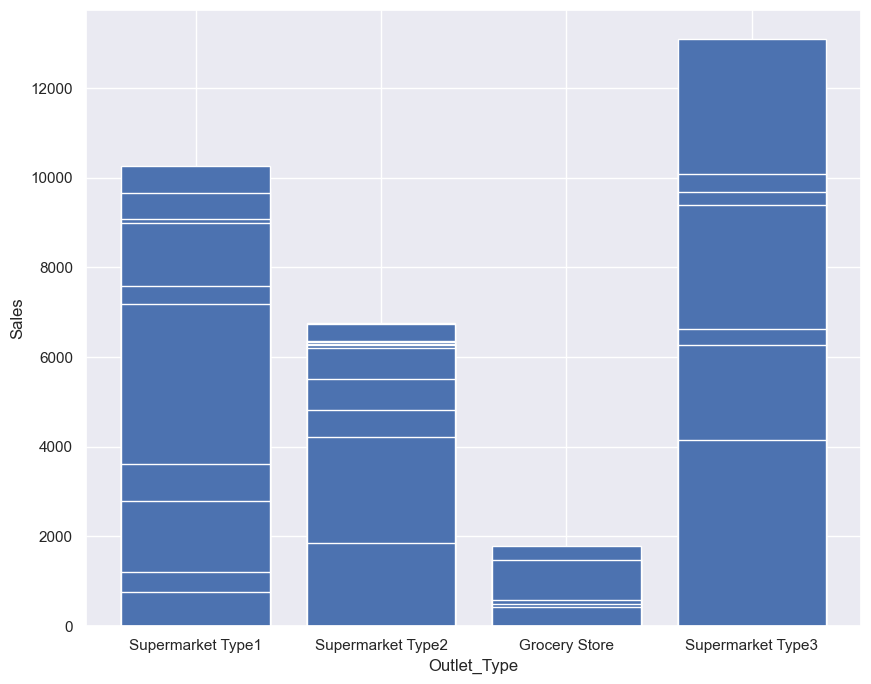

In [36]:
plt.rcParams['figure.figsize']=(10,8)
plt.bar(df.Outlet_Type,df['Item_Outlet_Sales']);
plt.rcParams.update({'font.size':14});
plt.xlabel('Outlet_Type');
plt.ylabel('Sales');

Observation 
Outlet_Type have some kind of impact on final sales like as Outlet type become bigger then sales also increasing
But still we will do one hot lable encoding for Outlet_Type

Label Encoding

In [37]:
df.head(1)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


In [40]:
df=pd.get_dummies(df , columns=['Outlet_Identifier','Item_Type','Outlet_Size','Outlet_Location_Type' ])

In [42]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Type,Item_Outlet_Sales,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,...,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,9.30,Low Fat,0.016047,249.8092,1999,Supermarket Type1,3735.1380,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,5.92,Regular,0.019278,48.2692,2009,Supermarket Type2,443.4228,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2,17.50,Low Fat,0.016760,141.6180,1999,Supermarket Type1,2097.2700,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,19.20,Regular,0.000000,182.0950,1998,Grocery Store,732.3800,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,8.93,Low Fat,0.000000,53.8614,1987,Supermarket Type1,994.7052,0,1,0,...,0,0,0,0,1,0,0,0,0,1


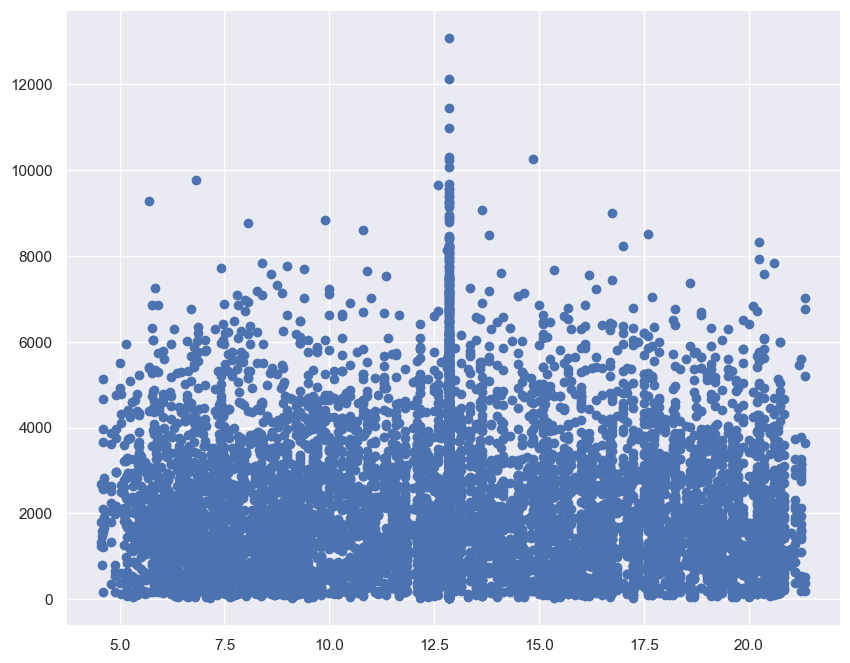

In [47]:
plt.scatter(x='Item_Weight' , y='Item_Outlet_Sales' , data=df)
#Item weight also doesn't make that kind of impact on final sales ...drop it

In [48]:
df.drop(columns=['Item_Weight'] , inplace=True)

In [51]:
df=pd.get_dummies(df , columns=['Item_Fat_Content'])

In [57]:
#Drop the Outlet_Establishment_Year col...
df.drop(columns=['Outlet_Establishment_Year'] , inplace=True)

In [61]:
df.head(2)

,Item_Visibility,Item_MRP,Outlet_Type,Item_Outlet_Sales,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,...,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular
0,0.016047,249.8092,Supermarket Type1,3735.1380,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
1,0.019278,48.2692,Supermarket Type2,443.4228,0,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,1


In [62]:
df.Outlet_Type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [72]:
df.Outlet_Type[df['Outlet_Type']=='Supermarket Type3'] = 4
df.Outlet_Type[df['Outlet_Type']=='Supermarket Type1'] = 3
df.Outlet_Type[df['Outlet_Type']=='Supermarket Type2'] = 2
df.Outlet_Type[df['Outlet_Type']=='Grocery Store'] = 1

C:\Users\HP\AppData\Local\Temp\ipykernel_10388\1864888232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Outlet_Type[df['Outlet_Type']=='Supermarket Type3'] = 4
C:\Users\HP\AppData\Local\Temp\ipykernel_10388\1864888232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Outlet_Type[df['Outlet_Type']=='Supermarket Type1'] = 3
C:\Users\HP\AppData\Local\Temp\ipykernel_10388\1864888232.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [74]:
df.columns

Index(['Item_Visibility', 'Item_MRP', 'Outlet_Type', 'Item_Outlet_Sales',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods', 'Outlet_Size_High',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Item_F

In [85]:
df.rename({'Outlet_Identifier_OUT010':'OUT010','Outlet_Identifier_OUT013':'OUT013','Outlet_Identifier_OUT017':'OUT017','Outlet_Identifier_OUT018':'OUT018','Outlet_Identifier_OUT019':'OUT019','Outlet_Identifier_OUT027':'OUT027' , 'Outlet_Identifier_OUT035':'OUT035','Outlet_Identifier_OUT045':'OUT045' ,'Outlet_Identifier_OUT046':'OUT046' , 'Outlet_Identifier_OUT049':'OUT049'}, axis = "columns",inplace = True)


In [87]:
df.columns

Index(['Item_Visibility', 'Item_MRP', 'Outlet_Type', 'Item_Outlet_Sales',
       'OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027', 'OUT035',
       'OUT045', 'OUT046', 'OUT049', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods', 'Outlet_Size_High',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular'],
      dtype='object')

In [88]:
df.rename({"Item_Type_Baking Goods":"BakingGoods","Item_Type_Breads":"Breads" , "Item_Type_Breakfast":"Breakfast","Item_Type_Canned":"Canned",
        "Item_Type_Dairy":"Dairy" , "Item_Type_Frozen Foods":"FrozenFoods","Item_Type_Fruits and Vegetables":"FruitsandVegetables" , "Item_Type_Hard Drinks":"HardDrinks",
          "Item_Type_Health and Hygiene":"HealthHygiene" , "Item_Type_Household":"Household","Item_Type_Meat":"Meat","Item_Type_Others":"Others"} , axis="columns" , inplace=True)

In [89]:
df.columns

Index(['Item_Visibility', 'Item_MRP', 'Outlet_Type', 'Item_Outlet_Sales',
       'OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027', 'OUT035',
       'OUT045', 'OUT046', 'OUT049', 'BakingGoods', 'Breads', 'Breakfast',
       'Canned', 'Dairy', 'FrozenFoods', 'FruitsandVegetables', 'HardDrinks',
       'HealthHygiene', 'Household', 'Meat', 'Others', 'Item_Type_Seafood',
       'Item_Type_Snack Foods', 'Item_Type_Soft Drinks',
       'Item_Type_Starchy Foods', 'Outlet_Size_High', 'Outlet_Size_Medium',
       'Outlet_Size_Small', 'Outlet_Location_Type_Tier 1',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular'],
      dtype='object')

In [90]:
df.rename({'Item_Type_Seafood':'Seafood' , 'Item_Type_Snack Foods':'SnackFoods','Item_Type_Soft Drinks':'SoftDrinks','Item_Type_Starchy Foods':'StarchyFoods'}, axis="columns" , inplace=True)

In [92]:
df.rename({'Outlet_Location_Type_Tier 1':'Tier1','Outlet_Location_Type_Tier 2':'Tier2','Outlet_Location_Type_Tier 3':'Tier3' , 
         'Item_Fat_Content_Low Fat':'LowFat' , 'Item_Fat_Content_Regular':'Regular' }, axis='columns' , inplace=True)

In [101]:
df.Outlet_Type=df.Outlet_Type.astype('int64')

In [107]:
# converting 'uint8' to 'int64'
for i in df.columns:
    if df[i].dtype == 'uint8':
        df[i]=df[i].astype('int64')

#Model Building

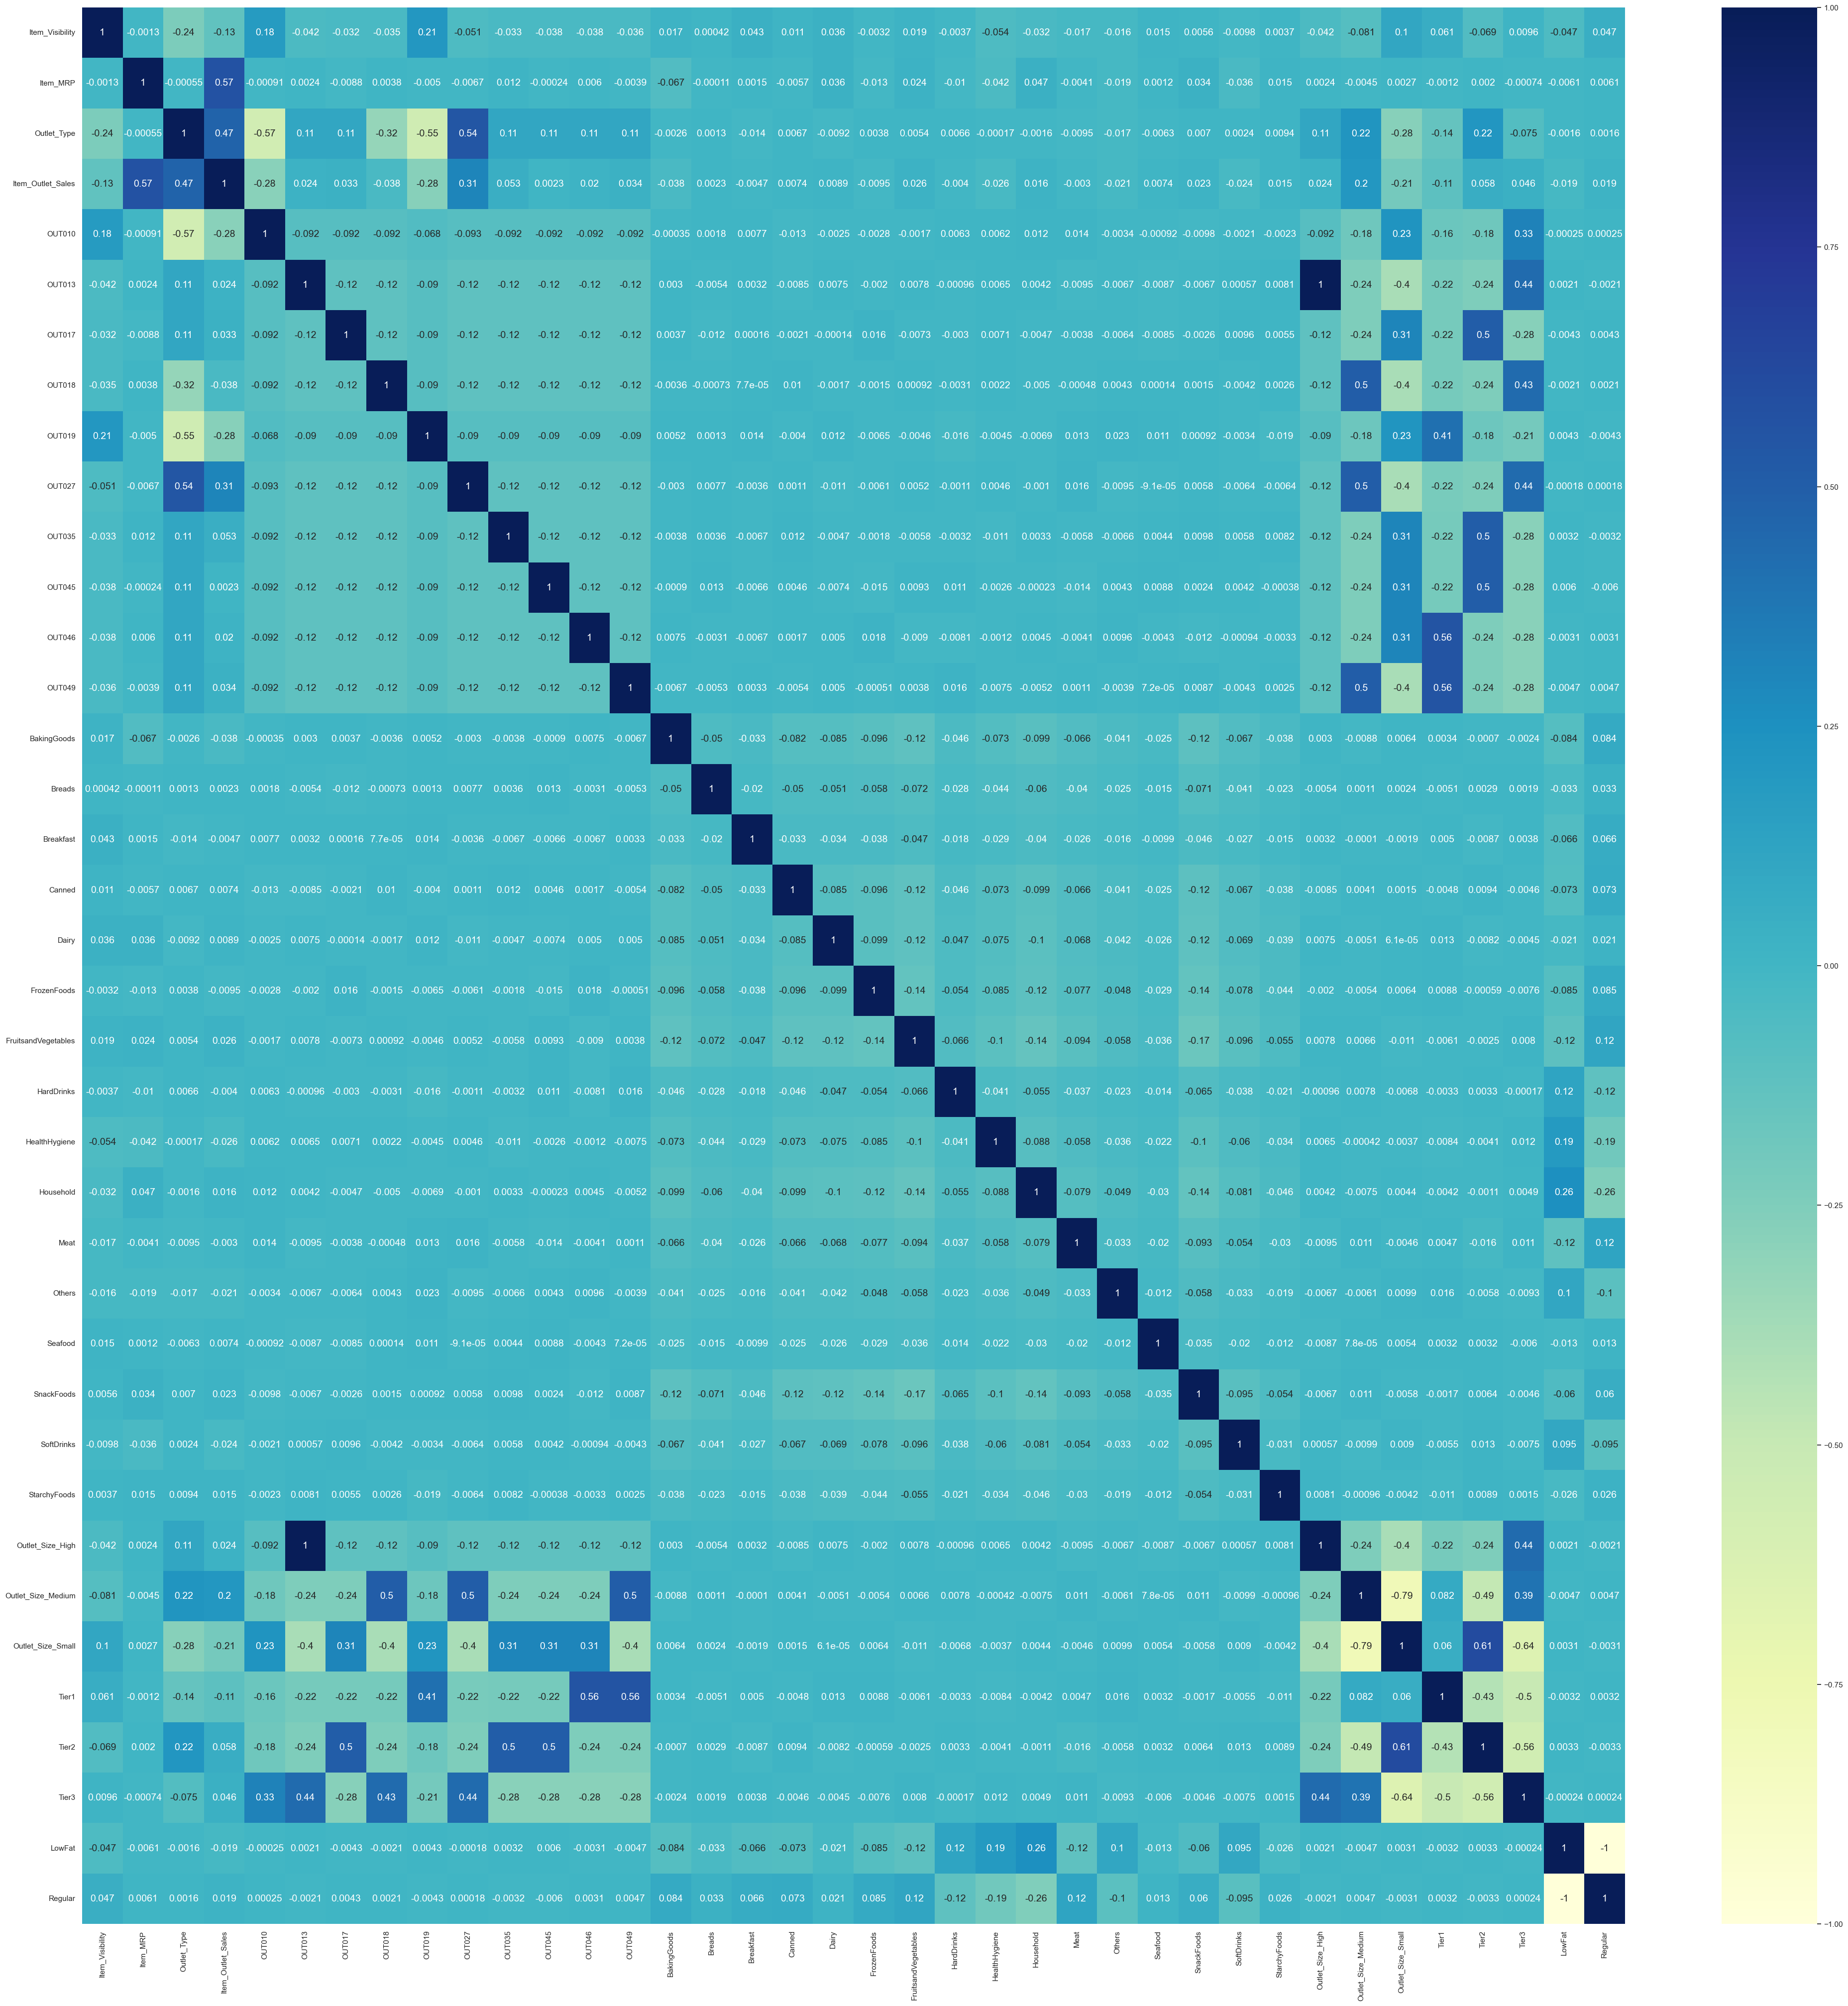

In [120]:
# Coorelation Matrix
cormat=df.corr()
top_corr_feature=cormat.index
plt.figure(figsize=(50,50))
g=sns.heatmap(df[top_corr_feature].corr(),annot=True , cmap='YlGnBu')

In [121]:
X=df.drop(columns='Item_Outlet_Sales')
y=df['Item_Outlet_Sales']

In [124]:
print(X.shape)
print(y.shape)

(8523, 37)
(8523,)


In [125]:
#find out feature importance

In [127]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [128]:
print(model.feature_importances_)

[0.09827518 0.44719416 0.18316596 0.00081682 0.00260176 0.00772678
 0.00771757 0.00046588 0.05593088 0.00787459 0.00632774 0.00644017
 0.00332986 0.00792096 0.00580433 0.00333942 0.00837636 0.01037664
 0.00977518 0.01153169 0.00458375 0.00663557 0.00872681 0.0066072
 0.00285404 0.00263113 0.01209546 0.00741536 0.00470752 0.00262167
 0.0111835  0.01072923 0.00453295 0.00450975 0.00285772 0.01134541
 0.01097097]


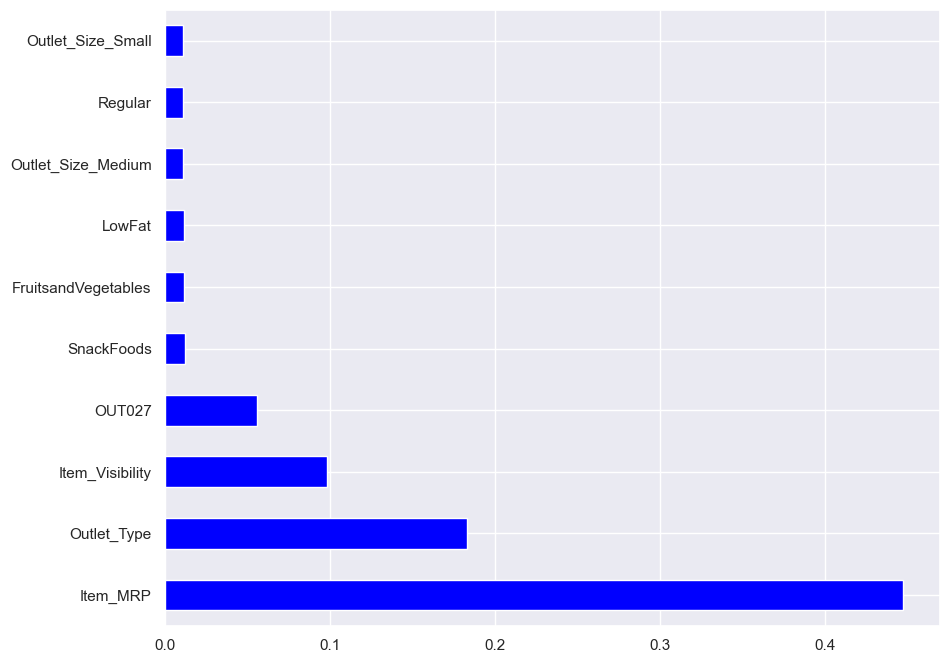

In [130]:
#plot graph of feature importance for better visualization
feat_imp=pd.Series(model.feature_importances_,index=X.columns)
feat_imp.nlargest(10).plot(kind='barh' , color='blue')
plt.show()

In [137]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

## Linear Regression Model:

In [138]:
# Fitting Multiple Linear Regression to the training set
from sklearn.linear_model import  LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [139]:
# Predicting the test set results
y_pred = regressor.predict(X_test)

In [140]:
y_pred

array([2475.67915574, 3109.56130278, 4579.02030076, ..., 2306.9589171 ,
       1929.05200585, 2736.31192568])

In [142]:
import warnings
warnings.filterwarnings('ignore')
# Measuring Accuracy
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

In [143]:
lr_accuracy = round(regressor.score(X_train,y_train) * 100,2)
lr_accuracy

56.71

In [144]:
r2_score(y_train, regressor.predict(X_train))

0.5670693464940161

## Decision Tree Model:

In [145]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=15,min_samples_leaf=300)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=300)

In [146]:
# Predicting the test set results
y_pred = regressor.predict(X_test)
y_pred

array([2430.32336856, 3076.38053795, 5126.84205469, ..., 2430.32336856,
       1937.03339601, 2601.08348816])

In [147]:
tree_accuracy = round(regressor.score(X_train,y_train),2)
tree_accuracy

0.58

In [148]:
r2_score(y_train, regressor.predict(X_train))

0.5775403262893632

## Random Forest Model:

In [171]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
ranregressor = RandomForestRegressor(n_estimators=100,max_depth=6, min_samples_leaf=50)
ranregressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, min_samples_leaf=50)

In [172]:
# Predicting the test set results
y_pred = ranregressor.predict(X_test)
y_pred

array([2532.84134749, 3173.20792597, 5028.32716306, ..., 2465.23102774,
       2052.30000012, 2594.75296399])

In [173]:
rf_accuracy = round(ranregressor.score(X_train,y_train),2)
rf_accuracy

0.62

In [174]:
r2_score(y_train, ranregressor.predict(X_train))

0.6172770958615243

In [159]:
r2=0.61

In [160]:
n=8523
k=37
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print(adj_r2_score)

0.6082993517972893


In [175]:
print("Regression model accuracy : " ,lr_accuracy)
print("Decision Tree Model accuracy : ", tree_accuracy*100)
print("Random Forest Model accuracy : " ,rf_accuracy*100)

Regression model accuracy :  56.71
Decision Tree Model accuracy :  57.99999999999999
Random Forest Model accuracy :  62.0


## Observations: The RandomForestClassifier Model has given good results but this can be tuned further to get better results

Storing of model

In [176]:
import pickle
file=open('randbigsale.pkl','wb')

#dump information to that file
pickle.dump(ranregressor , file)